In [80]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib

def fano(x, A, x0, gamma, q, b):
    epsilon = (2 * (x - x0)) / gamma
    return A * ((q + epsilon)**2 / (1 + epsilon**2)) + b
def lorentzian(x, A, x0, gamma, k, b):
    return A / (1 + ((x - x0) / gamma)**2) + k * x + b
def double_fano(x, A1, x1, gamma1, q1, A2, x2, gamma2, q2, b):
    return fano(x, A1, x1, gamma1, q1, b) + fano(x, A2, x2, gamma2, q2, 0)
def lorentzian_fano(x, A1, x1, gamma1, A2, x2, gamma2, q2, k, b):
    return lorentzian(x, A1, x1, gamma1, k, b) + fano(x, A2, x2, gamma2, q2, 0, 0)
def double_lorentzian(x, A1, x1, gamma1, A2, x2, gamma2, k, b):
    return lorentzian(x, A1, x1, gamma1, k, b) + lorentzian(x, A2, x2, gamma2, 0, 0)

%pwd

'/home/chn/repo/SiC-2nd-paper'

In [81]:
def fitting_peek(x, y, x_range, function, guess, bound):
  mask = (x > x_range[0]) & (x < x_range[1])
  x = x[mask]
  y = y[mask]
  popt, pcov = curve_fit(function, x, y, p0=guess, maxfev=10000, bounds=bound)
  return popt

def fitting_line(x, y):
  shift = []
  height = []
  width_of_half_peak = []
  integration = []

  result = fitting_peek(x, y, fitting_range[0], double_lorentzian, fitting_init_parameter[0], fitting_bound[0])
  shift.append(result[1])
  shift.append(result[4])
  height.append(result[0])
  height.append(result[3])
  width_of_half_peak.append(result[2] * 2)
  width_of_half_peak.append(result[5] * 2)
  integration.append(result[0] * result[2] * np.pi)
  integration.append(result[3] * result[5] * np.pi)

  result = fitting_peek(x, y, fitting_range[1], lorentzian, fitting_init_parameter[1], fitting_bound[1])
  shift.append(result[1])
  height.append(result[0])
  width_of_half_peak.append(result[2] * 2)
  integration.append(result[0] * result[2] * np.pi)

  result = fitting_peek(x, y, fitting_range[2], lorentzian, fitting_init_parameter[2], fitting_bound[2])
  shift.append(result[1])
  height.append(result[0])
  width_of_half_peak.append(result[2] * 2)
  integration.append(result[0] * result[2] * np.pi)

  # result = fitting_peek(x, y, fitting_range[3], double_lorentzian, fitting_init_parameter[3], fitting_bound[3])
  # shift.append(result[1])
  # shift.append(result[4])
  # height.append(result[0])
  # height.append(result[3])
  # width_of_half_peak.append(result[2] * 2)
  # width_of_half_peak.append(result[5] * 2)
  # integration.append(result[0] * result[2] * np.pi)
  # integration.append(result[3] * result[5] * np.pi)

  return shift, height, width_of_half_peak, integration

In [82]:
# 假定所有的 x 都是一样的，从第一个文件中读入
def read_x():
  with open("画图/拉曼结果拟合/250910/3/1/1zyyz.txt", "r", encoding="utf-8", errors="ignore") as f:
    line = f.readline()
    return np.array([float(val) for val in line.strip().split()])
x = read_x()
print(x)

# y 的下标为：wafer polarization site
y = []
for w in range(0, 6):
  y_wafer = []
  for polarization in [ "zyyz", "zyxz" ]:
    y_polarization = []
    with open(f"画图/拉曼结果拟合/250910/3/{w+1}/1{polarization}.txt", "r", encoding="utf-8", errors="ignore") as f:
      lines = f.readlines()
      for site in range(0, 11):
        line = lines[site + 1]
        y_polarization.append(np.array([float(val) for val in line.strip().split()[1:]]))
    y_wafer.append(y_polarization)
  y.append(y_wafer)
print(y[0])
print(len(y[1][0]))

[170.105 170.622 171.141 171.659 172.178 172.697 173.215 173.734 174.251
 174.769 175.288 175.806 176.325 176.841 177.359 177.878 178.396 178.914
 179.43  179.949 180.467 180.985 181.503 182.019 182.537 183.056 183.574
 184.09  184.608 185.126 185.643 186.159 186.677 187.195 187.711 188.229
 188.746 189.262 189.78  190.297 190.813 191.33  191.848 192.364 192.881
 193.399 193.914 194.431 194.949 195.464 195.981 196.499 197.014 197.531
 198.046 198.564 199.081 199.596 200.113 200.628 201.145 201.66  202.177
 202.694 203.209 203.726 204.241 204.758 205.272 205.789 206.304 206.821
 207.335 207.852 208.366 208.883 209.398 209.914 210.429 210.945 211.46
 211.976 212.49  213.005 213.521 214.035 214.552 215.066 215.582 216.096
 216.61  217.127 217.641 218.157 218.671 219.185 219.701 220.215 220.731
 221.245 221.758 222.274 222.788 223.302 223.818 224.331 224.845 225.361
 225.874 226.388 226.904 227.417 227.931 228.446 228.96  229.473 229.986
 230.502 231.015 231.528 232.042 232.557 233.07  233

In [ ]:
fitting_init_parameter = [
  [300, 196, 1, 2e3, 204, 0.8, 0, 900],
  [50, 266, 5, 0, 100],
  [1e3, 611, 5, 0, 100],
  [1e4, 776, 1, 1e3, 797, 1, 1, 100]
]
fitting_range = [
  [180, 220],
  [250, 280],
  [600, 617],
  [700, 850]
]
fitting_bound = [
  ([0, 192, 0, 0, 200, 0, -np.inf, -np.inf], [np.inf, 198, np.inf, np.inf, 206, np.inf, np.inf, np.inf]),
  ([0, 260, 0, -np.inf, -np.inf], [np.inf, 270, np.inf, np.inf, np.inf]),
  ([0, 605, 0, -np.inf, -np.inf], [np.inf, 617, np.inf, np.inf, np.inf]),
  (-np.inf, np.inf)
]

In [84]:
fig = go.Figure()
for w in range(0, 6):
  for polarization in range(0, 2):
    for site in range(0, 11):
      fig.add_trace(go.Scatter(x=x, y=y[w][polarization][site], mode='lines', name=f'{w}-{polarization}-{site}', line=dict(color=matplotlib.colors.rgb2hex(plt.cm.viridis(w / 6)))))
fig.update_layout(width=1920, height=1080)
fig.show()

In [85]:
for w in range(0, 6):
  for polarization in range(0, 2):
    for site in range(0, 11):
      this_y = y[w][polarization][site]
      print(w, polarization, site)
      result = fitting_peek(x, this_y, fitting_range[2], lorentzian, fitting_init_parameter[2], fitting_bound[2])
      fig = go.Figure()
      fig.add_trace(go.Scatter(x=x, y=np.log10(this_y), mode='lines', name='data'))
      fig.add_trace(go.Scatter(x=x, y=np.log10(lorentzian(x, *result)), mode='lines', name='fit'))
      # fig.update_yaxes(range=[1, 4])
      # fig.show()
      print(result)

0 0 0
[ 5.81059645e+02  6.10968842e+02  1.03764233e+00 -1.98897705e+00
  1.38782196e+03]
0 0 1
[ 5.78347898e+02  6.10963032e+02  1.05148439e+00 -2.19195895e+00
  1.50967899e+03]
0 0 2
[ 5.82964394e+02  6.10966320e+02  1.06054203e+00 -2.14710357e+00
  1.48094421e+03]
0 0 3
[ 5.67885884e+02  6.10987411e+02  1.06143360e+00 -2.37879841e+00
  1.61900298e+03]
0 0 4
[ 5.64632213e+02  6.10963638e+02  1.05944107e+00 -2.27288255e+00
  1.55477906e+03]
0 0 5
[ 5.66637303e+02  6.10962360e+02  1.06533366e+00 -1.97806883e+00
  1.37478707e+03]
0 0 6
[ 5.63570420e+02  6.10945858e+02  1.06944586e+00 -1.94848246e+00
  1.36251295e+03]
0 0 7
[ 5.57867411e+02  6.10919415e+02  1.10195976e+00 -2.18147143e+00
  1.50208553e+03]
0 0 8
[ 5.34474960e+02  6.10931646e+02  1.09638846e+00 -1.86495974e+00
  1.30526044e+03]
0 0 9
[ 5.34889598e+02  6.10927469e+02  1.12397305e+00 -1.90867542e+00
  1.33273542e+03]
0 0 10
[ 5.63375774e+02  6.10957452e+02  1.12568922e+00 -2.39729027e+00
  1.63073192e+03]
0 1 0
[ 2.08266281e+

In [86]:
# wafer polarization site peek
shift = np.empty((6, 2, 11, 4))
height = np.empty((6, 2, 11, 4))
fwhm = np.empty((6, 2, 11, 4))
integration = np.empty((6, 2, 11, 4))

polarization = [ "zyyz", "zyxz" ]

for w in range(0, 6):
  for p in range(0, 2):
    for s in range(0, 11):
      this_shift, this_height, this_fwhm, this_integration = fitting_line(x, y[w][p][s])
      shift[w, p, s, :] = abs(np.array(this_shift))
      height[w, p, s, :] = abs(np.array(this_height))
      fwhm[w, p, s, :] = abs(np.array(this_fwhm))
      integration[w, p, s, :] = abs(np.array(this_integration))

shift_uniformed = np.empty((6, 2, 11, 4))
height_uniformed = np.empty((6, 2, 11, 4))
fwhm_uniformed = np.empty((6, 2, 11, 4))
integration_uniformed = np.empty((6, 2, 11, 4))

for w in range(0, 6):
  for p in range(0, 2):
    for s in range(0, 11):
      for pe in range(0, 4):
        shift_uniformed[w, p, s, pe] = shift[w, p, s, pe] - shift[w, p, s, 3]
        height_uniformed[w, p, s, pe] = height[w, p, s, pe] / np.average(height[:, p, :, pe])
        fwhm_uniformed[w, p, s, pe] = fwhm[w, p, s, pe] / np.average(fwhm[:, p, :, pe])
        integration_uniformed[w, p, s, pe] = integration[w, p, s, pe] / np.average(integration[:, p, :, pe])

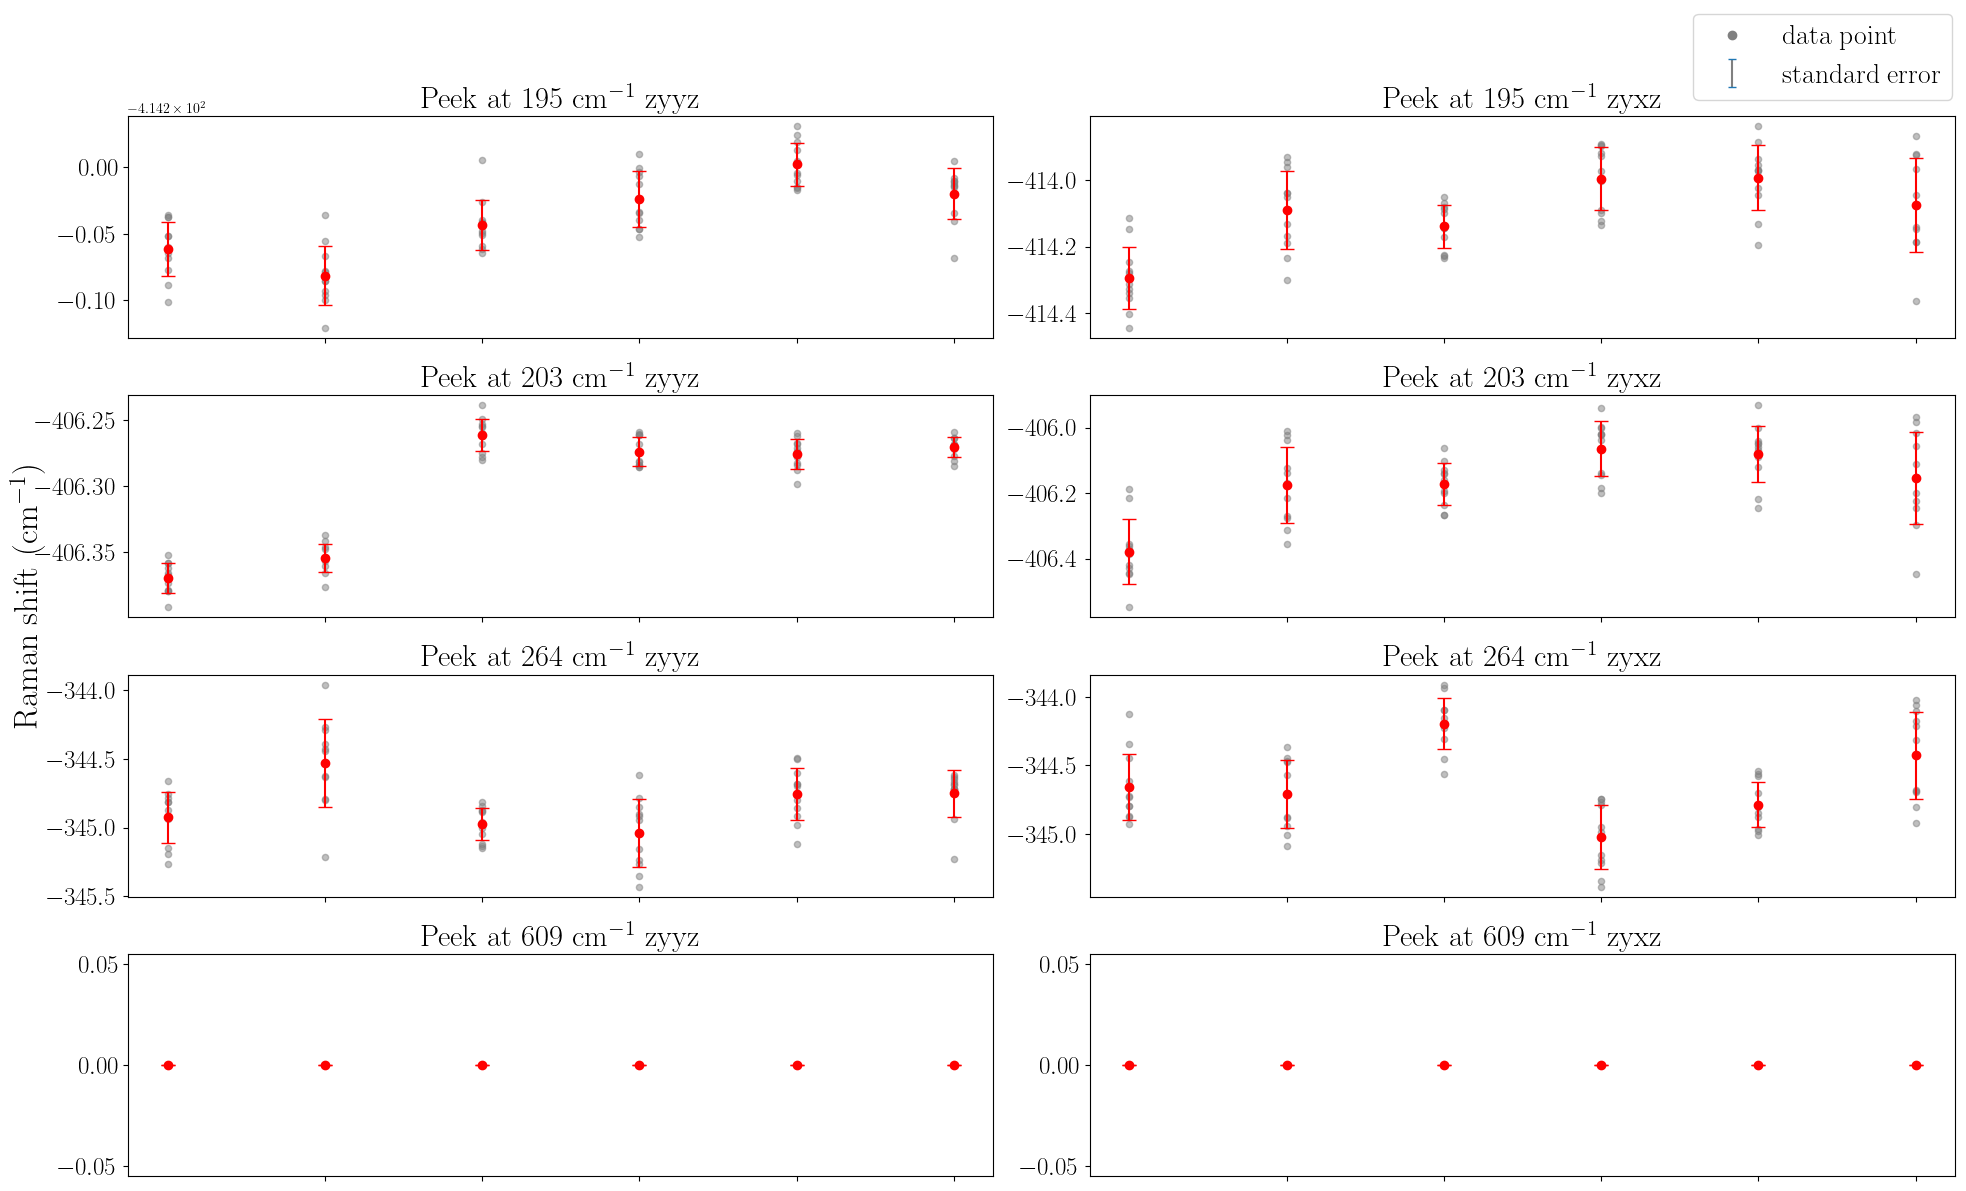

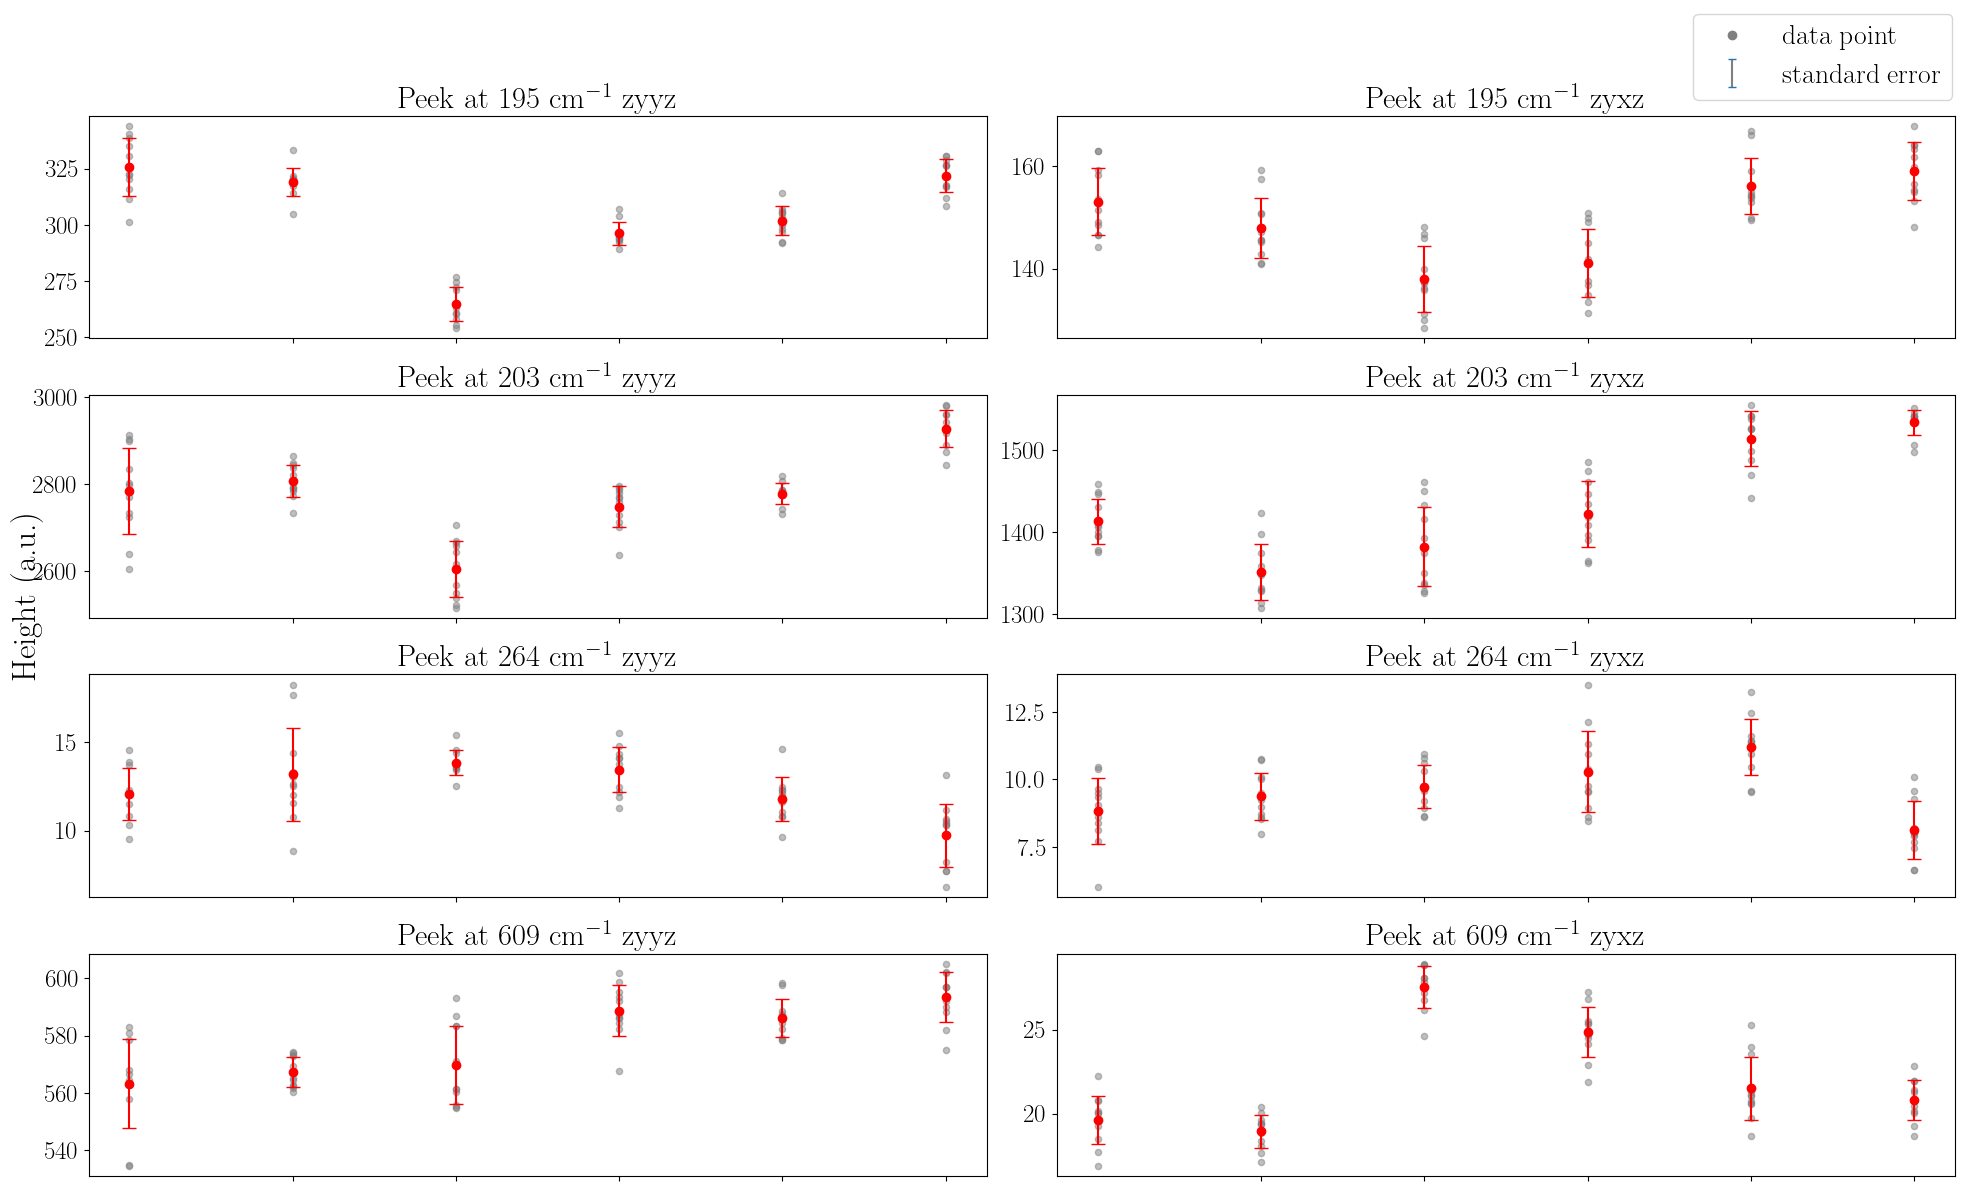

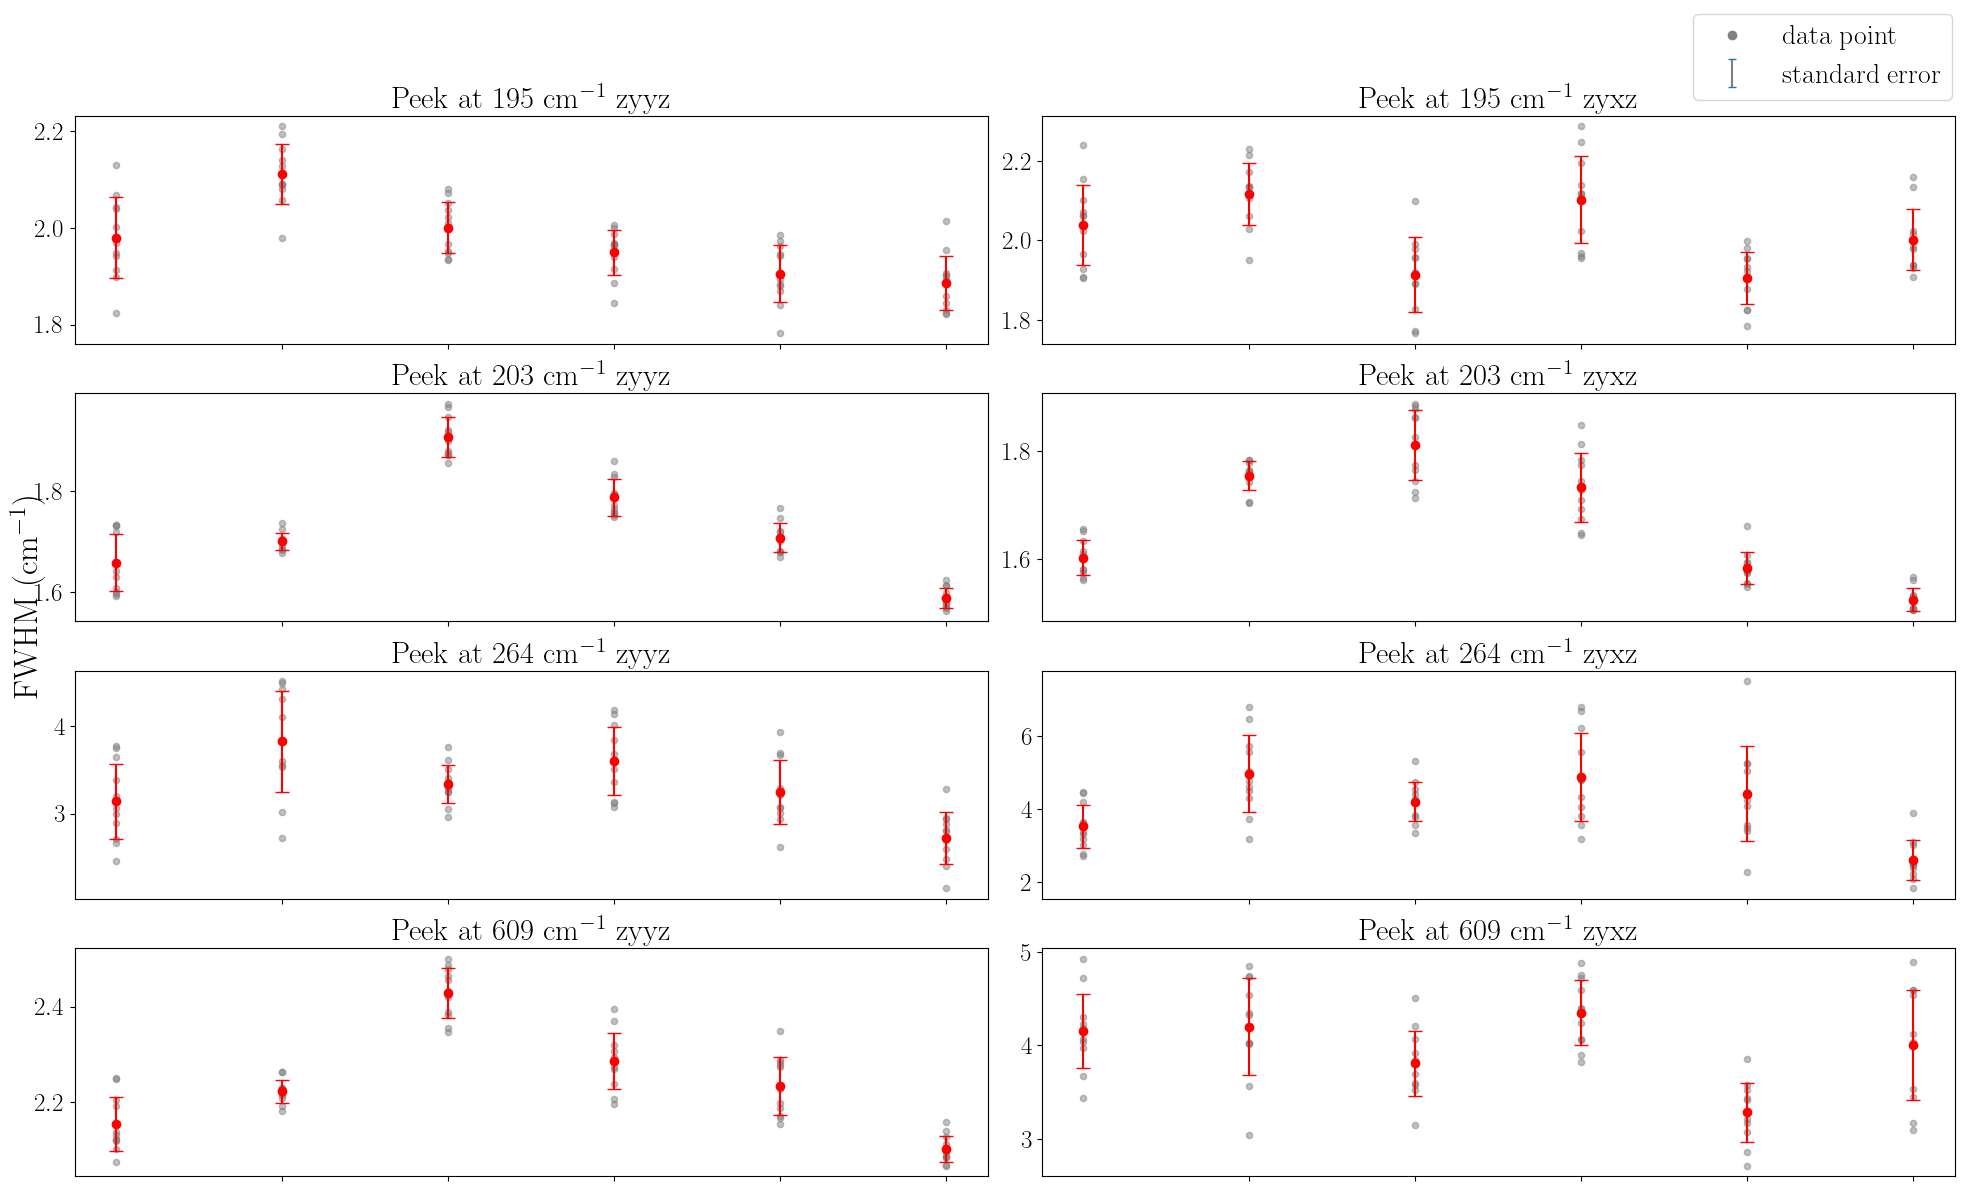

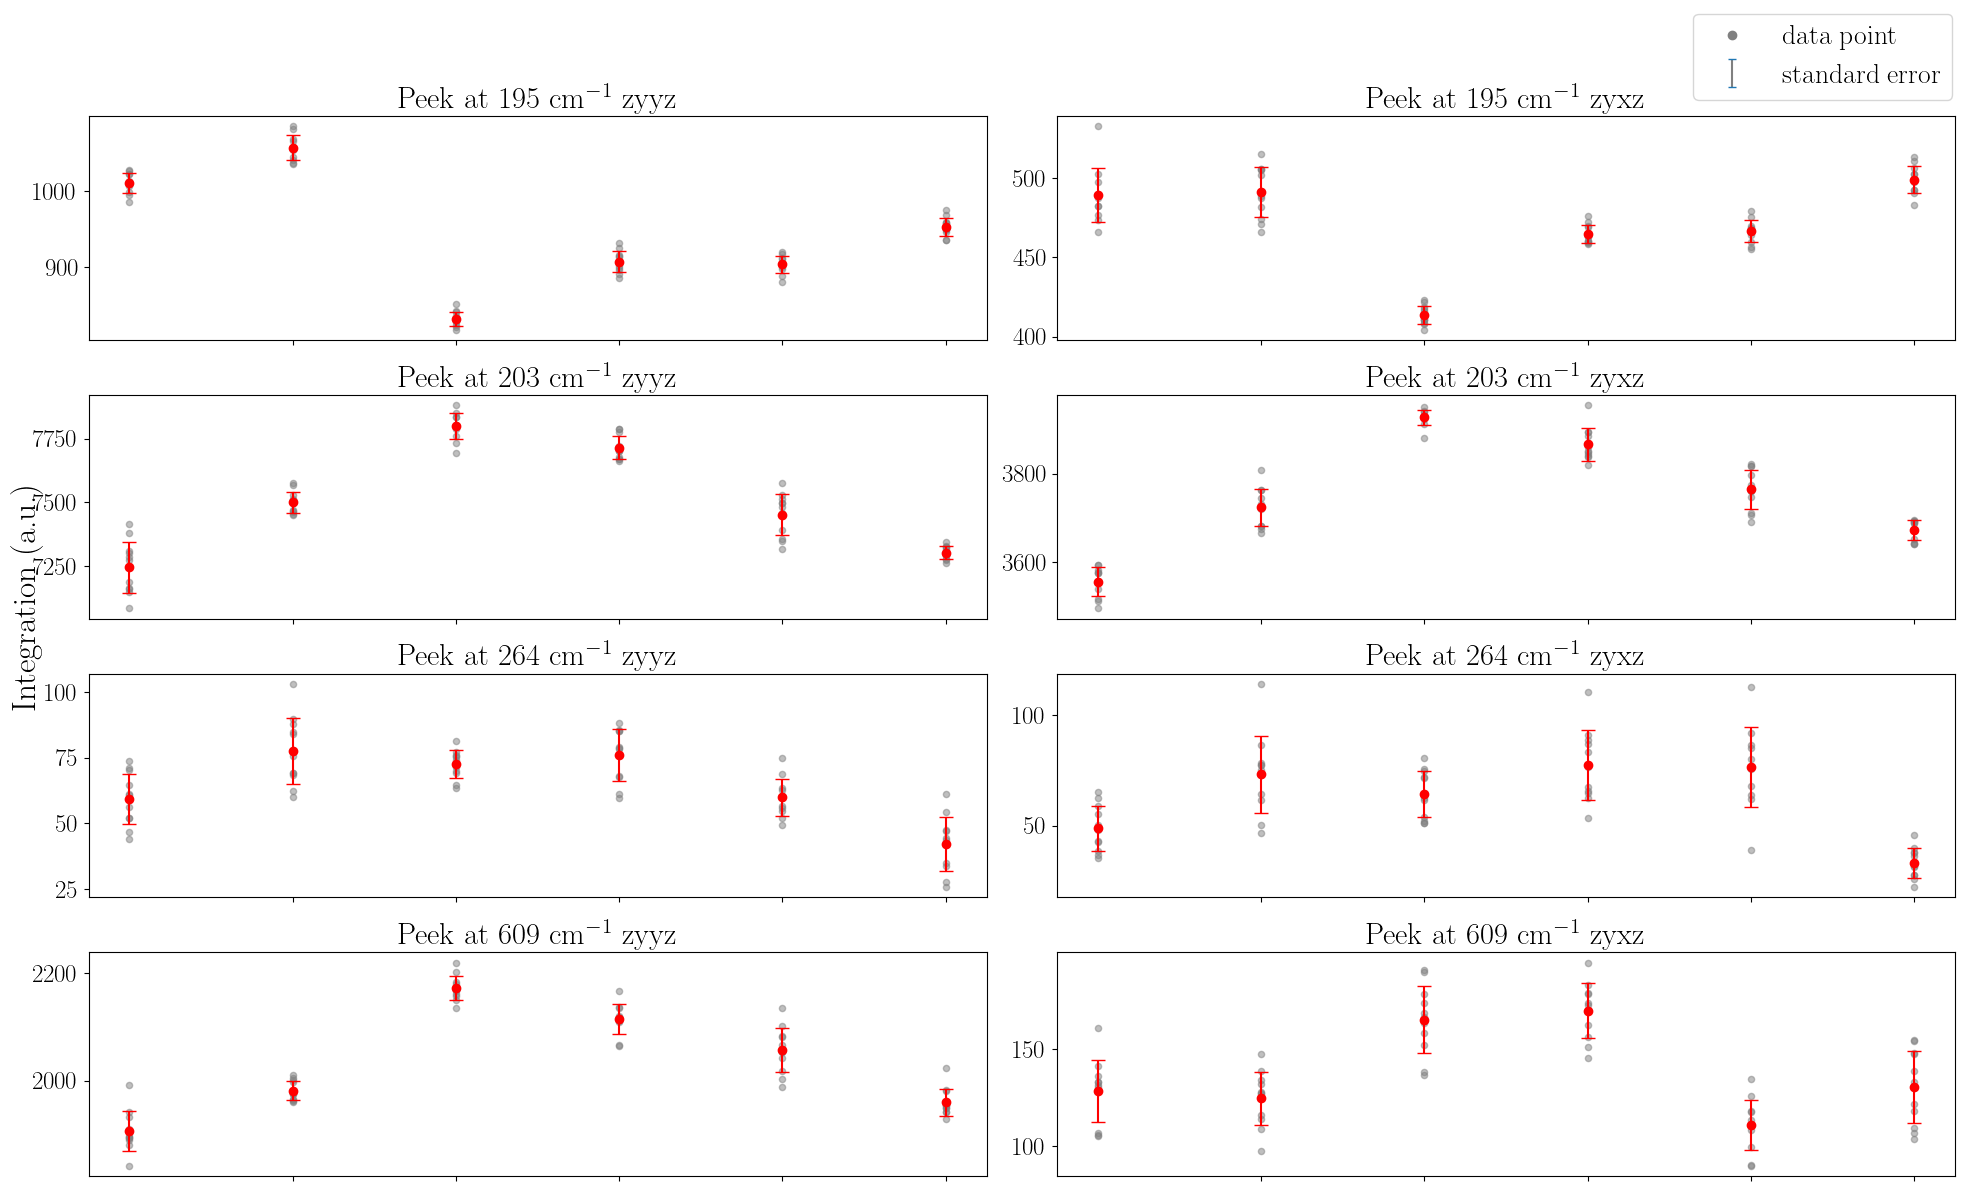

In [87]:
from matplotlib.container import ErrorbarContainer
from matplotlib.lines import Line2D
from matplotlib.collections import LineCollection
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Arial'

x_label = [ "substrate", r"Al\\$0.1\times10^{18}$", r"Al\\$3.8\times10^{18}$", r"Al\\$5.1\times10^{18}$", r"Al\\$6.4\times10^{18}$", r"Al\\$10\times10^{18}$" ]
peek_name = [ r"Peek at 195 $\mathrm{cm^{-1}}$", r"Peek at 203 $\mathrm{cm^{-1}}$", r"Peek at 264 $\mathrm{cm^{-1}}$", r"Peek at 609 $\mathrm{cm^{-1}}$" ]
polarization_name = [ "zyyz", "zyxz" ]
vars = [ shift_uniformed, height, fwhm, integration ]
title = [ "Raman shift (cm$^{-1}$)", "Height (a.u.)", "FWHM (cm$^{-1}$)", "Integration (a.u.)" ]
var_name = [ "shift", "height", "fwhm", "integration" ]

for property in range(0, 4):
  fig, axes = plt.subplots(4, 2, figsize=(20, 12))  # 4行2列的子图
  for p in range(0, 2):
    for pe in range(0, 4):
      ax = axes[pe, p]
      ax.set_title(f"{peek_name[pe]} {polarization_name[p]}", fontsize=22)
      var = vars[property]
      for w in range(0, 6):
        for s in range(0, 11):
          ax.scatter(w, var[w, p, s, pe], color='gray', s=20, alpha=0.5)
        ax.errorbar(w, np.mean(var[w, p, :, pe]), yerr=np.std(var[w, p, :, pe]), fmt='o', color="red", capsize=5)
      # 在最后一个 ax 上标刻度
      ax.set_xticks([1, 2, 3, 4, 5], labels="")
      ax.tick_params(axis='y', which='major', labelsize=18)
      if pe == 5:
        ax.set_xticklabels(x_label[1:], fontsize=22)
  fig.supylabel(title[property], fontsize=24)
  fig.tight_layout()
  line = Line2D([],[], ls="none")
  barline = LineCollection(np.empty((2,2,2)), color='gray')
  err = ErrorbarContainer((line, [line], [barline]), has_xerr=False, has_yerr=True, label='standard error')

  custom_handles = [
    Line2D([0], [0], color='gray', marker='o', linestyle='', label='data point'),
    err
  ]
  fig.legend(handles=custom_handles, loc='upper right', fontsize=20)
  fig.subplots_adjust(top=0.9)
  # fig.savefig(f"画图/拉曼结果拟合/250910/3/{var_name[property]}.png", dpi=150)